In [1]:

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import import_ipynb
import func_format
import func_analysis
import glob

def crosscorrelation(spikesref, spikesneuron2, binsize = 1, start = -200, stop = 200):
    crosscorrall = np.zeros(len(np.arange(start, stop, binsize)))
    bins = np.arange(start, stop+binsize, binsize)
    for j, spike in enumerate(spikesref):
        histspikes = np.array(spikesneuron2 - spike)
        [crosscorr, bins_output] = np.histogram(histspikes, bins = bins)
        crosscorrall = crosscorrall+crosscorr
        
    return(crosscorrall)


importing Jupyter notebook from func_format.ipynb
importing Jupyter notebook from func_analysis.ipynb


In [2]:
drive = 'F:/'
ratID = ['Amygdala3', 'Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['05052018', '13042019', '01102019', '27062020', '06072020']


modalities = ['Male', 'Female', 'Object', 'Food']

#### cross-correlation between units across baseline--event--after period for the first presentation of each modality 
#### save raw file then work on plotting

for r, rat in enumerate(ratID):
    savepath = drive+rat+'/Analyses/'+date[r]+'/crosscorrelations_firstintsovertime_newbinsize/'
    func_format.foldercheck(savepath)
    
    neuronpath = drive+rat+'/Electrophys/'+date[r]+'/SpikeTimes/Neurons_BLA/'
    configpath = drive+rat+'/Parameters_'+date[r]+'.yml'
    [foldername, inttype, intcat, presentationnum, videosync_start, videosync_stop, framerate, framestouse, intsync_start, intsync_stop] = func_format.openconfig(configpath)
    
    binsize = 1
    
    
    for x, cat in enumerate(modalities):
    
        firstint = np.where(np.ravel(intcat) == cat)[0][0]
        
        basestart = (intsync_start[firstint] - 300)*1000
        start = (intsync_start[firstint])*1000
        stop = (intsync_stop[firstint])*1000
        afterintstop = (intsync_stop[firstint] + 300)*1000
    
        for n, neuron in enumerate(os.listdir(neuronpath)):
            neuronname = neuron[:-4]
            neu = np.array(np.ravel(np.load(neuronpath+neuron)))
            basespikes = func_analysis.extractSpikes(neu, basestart, start)
            intspikes = func_analysis.extractSpikes(neu, start, stop)
            afterintspikes = func_analysis.extractSpikes(neu, stop, afterintstop)
            
            if len(basespikes) < 1:
                nothing = 0
            else:
                crosscorrsaveallbase = np.hstack((neuronname, np.arange(-10, 10, .25)))
                for n2, neuron2 in enumerate(os.listdir(neuronpath)):
                    if n == n2:
                        continue
                    neuronname2 = neuron2[:-4]
                    neu2 = np.ravel(np.load(neuronpath+neuron2))
                    basespikes2 = func_analysis.extractSpikes(neu2, basestart, start)
                    
                    if len(basespikes2) < 1:
                        crosscorrsavebase = np.hstack((neuronname2, np.full((80), np.nan)))
                        crosscorrsaveallbase = np.vstack((crosscorrsaveallbase, crosscorrsavebase))
                    else:
                        crosscorrallbase = crosscorrelation(basespikes, basespikes2, binsize = .25, start = -10, stop = 10)
                        crosscorrsavebase = np.hstack((neuronname2, crosscorrallbase))
                        crosscorrsaveallbase = np.vstack((crosscorrsaveallbase, crosscorrsavebase))
                np.save(savepath+neuronname+'_crosscorrelationbase_'+cat+'.npy', crosscorrsaveallbase)
                
            if len(intspikes) < 1:
                nothing = 0
            else:
                crosscorrsaveallint = np.hstack((neuronname, np.arange(-10, 10, .25)))
                for n2, neuron2 in enumerate(os.listdir(neuronpath)):
                    if n == n2:
                        continue
                    neuronname2 = neuron2[:-4]
                    neu2 = np.ravel(np.load(neuronpath+neuron2))
                    intspikes2 = func_analysis.extractSpikes(neu2, start, stop)
                    
                    if len(intspikes2) < 1:
                        crosscorrsaveint = np.hstack((neuronname2, np.full((80), np.nan)))
                        crosscorrsaveallint = np.vstack((crosscorrsaveallint, crosscorrsaveint))
                    else:
                        crosscorrallint = crosscorrelation(intspikes, intspikes2, binsize = .25, start = -10, stop = 10)
                        crosscorrsaveint = np.hstack((neuronname2, crosscorrallint))
                        crosscorrsaveallint = np.vstack((crosscorrsaveallint, crosscorrsaveint))
                np.save(savepath+neuronname+'_crosscorrelationint_'+cat+'.npy', crosscorrsaveallint)
            
            if len(afterintspikes) < 1:
                nothing = 0
            else:
                crosscorrsaveallafter = np.hstack((neuronname, np.arange(-10, 10, .25)))
                for n2, neuron2 in enumerate(os.listdir(neuronpath)):
                    if n == n2:
                        continue
                    neuronname2 = neuron2[:-4]
                    neu2 = np.ravel(np.load(neuronpath+neuron2))
                    afterintspikes2 = func_analysis.extractSpikes(neu2, stop, afterintstop)
                    
                    if len(afterintspikes2) < 1:
                        crosscorrsaveafter = np.hstack((neuronname2, np.full((80), np.nan)))
                        crosscorrsaveallint = np.vstack((crosscorrsaveallafter, crosscorrsaveafter))
                    else:
                        crosscorrallafter = crosscorrelation(afterintspikes, afterintspikes2, binsize = .25, start = -10, stop = 10)
                        crosscorrsaveafter = np.hstack((neuronname2, crosscorrallafter))
                        crosscorrsaveallafter = np.vstack((crosscorrsaveallafter, crosscorrsaveafter))
                np.save(savepath+neuronname+'_crosscorrelationafter_'+cat+'.npy', crosscorrsaveallafter)
                
            

            print(neuronname, ' completed ' + cat)

104A  completed Male
10A  completed Male
10B  completed Male
10C  completed Male
110A  completed Male
11A  completed Male
11B  completed Male
124A  completed Male
130A  completed Male
133A  completed Male
13A  completed Male
13B  completed Male
13D  completed Male
141A  completed Male
14A  completed Male
14B  completed Male
17A  completed Male
17B  completed Male
185A  completed Male
185B  completed Male
18A  completed Male
24A  completed Male
24B  completed Male
25A  completed Male
25B  completed Male
25C  completed Male
25D  completed Male
27A  completed Male
28A  completed Male
29A  completed Male
29B  completed Male
2A  completed Male
2B  completed Male
2C  completed Male
2D  completed Male
33A  completed Male
33B  completed Male
33C  completed Male
33D  completed Male
33E  completed Male
34A  completed Male
37A  completed Male
37B  completed Male
38A  completed Male
41A  completed Male
41B  completed Male
43A  completed Male
43B  completed Male
45A  completed Male
47A  completed M

MemoryError: In RendererAgg: Out of memory

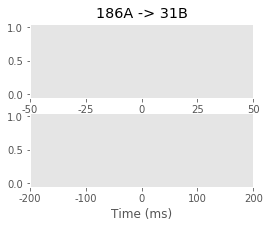

In [3]:
drive = 'F:/'
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '07062020']

for r, rat in enumerate(ratID):
    
    directory = drive+rat+'/Analyses/'+date[r]+'/crosscorrelations_firstintsovertime/'
    
    
    savepath = drive+rat+'/Analyses/'+date[r]+'/crosscorrelations_firstintsovertime/graphs_firstintovertime/'
    func_format.foldercheck(savepath)
    
    neuronpath = drive+rat+'/Electrophys/'+date[r]+'/SpikeTimes/Neurons_rename/'
    neurondir = os.listdir(neuronpath)
    
    for n, neu in enumerate(neurondir):
        savepathneu = savepath+neu[:-4]+'/'
        func_format.foldercheck(savepathneu)
        
        files = glob.glob(directory+neu[:-4]+'*')
        
        for i, file in enumerate(files):
            
            crosscorrelations = np.load(file)

            for j, row in enumerate(crosscorrelations[1:]):
                plt.close()

                fig, ax = plt.subplots(2, figsize = (4, 3))
                ax[0].plot(np.array(row[1:], np.float32), color = 'black')
                ax[0].set_xlim(150, 250)
                ax[0].grid(False)
                ax[0].set_xticks((150, 175, 200, 225, 250))
                ax[0].set_xticklabels((-50, -25, 0, 25, 50))
                ax[0].set_xlabel('Time (ms)')

                ax[1].plot(np.array(row[1:], np.float32), color = 'black')
                ax[1].set_xlim(0, 400)
                ax[1].grid(False)
                ax[1].set_xticks((0, 100, 200, 300, 400))
                ax[1].set_xticklabels((-200, -100, 0, 100, 200))
                ax[1].set_xlabel('Time (ms)')

                ax[0].set_title(str(crosscorrelations[0][0])+' -> '+str(row[0]))

                plt.tight_layout()
                plt.savefig(savepathneu+str(crosscorrelations[0][0])+'to'+str(row[0])+'_'+file[88:-4]+'.png')
                
    print(neu[:-4]+' finished')
            
print('finished')
            
            
        
        